# **Saddle node**

Consider the following system of equations
$$
\left\lbrace
\begin{align}
\dot{x} &= x - y \\
\dot{y} &= 1 - e^x
\end{align}
\right..
$$

The only fix point is $(x^*,y^*)=(0,0)$.

The Jacobian matrix is
$$
J(x,y) = \left(
\begin{matrix}
1 & -1 \\
-e^x & 0
\end{matrix}
\right)
\quad\Longrightarrow\quad
J(x^*,y^*) = \left(
\begin{matrix}
1 & -1 \\
-1 & 0
\end{matrix}
\right).
$$

Therefore
$$
\left\lbrace
\begin{align}
&\Delta = -1 < 0 \\
&\tau = 1 > 0 \\
&\tau^2 - 4\Delta = 5 > 0
\end{align}
\right..
$$

This indicates the fixed point corresponds to a *saddle node*.

## Numerical analysis

First import the modules that will be needed below

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline

A function returning the eigenvalues and eigenvectors will be useful 

In [2]:
def get_eigen(_A):
    """
    Get the eigenvalues and eigenvectors of the matrix _A
    """
    eigval, eigvec = np.linalg.eig(_A(0, 0))
    l1 = eigval[0]
    l2 = eigval[1]
    v1=np.array(np.transpose(eigvec[:,0]))
    v2=np.array(np.transpose(eigvec[:,1]))
    return l1,l2,v1,v2

as well as a function plotting the vector field using `streamplot`

In [3]:
def plot_vector_field(_lims, _vfield):
    """
    Plot the vector field _vfield in a grid with limits _lims
    """
    xlims = _lims[0]
    ylims = _lims[1]
    xlo,xhi,ylo,yhi = xlims[0],xlims[1],ylims[0],ylims[1]
    XX, YY = np.meshgrid(np.arange(xlo,xhi,0.01), np.arange(ylo,yhi,0.01))
    DX, DY = _vfield([XX, YY], 0)
    plt.streamplot(XX,YY,DX,DY,color='darkcyan',density=1.,minlength=0.2,linewidth=2,arrowsize=2.5)

and a function to plot local manifolds

In [4]:
def plot_local_manifold(_lims, _vfield, _evec):
    """
    Plot a local manifold curve and directions given by it's eigenvector
    """
    xlims = _lims[0]
    ylims = _lims[1]
    xlo,xhi,ylo,yhi = xlims[0],xlims[1],ylims[0],ylims[1]
    # curve
    x = np.linspace(xlo,xhi,100)
    slope = _evec[0,1]/_evec[0,0]
    m1=slope*x
    plt.plot(x,m1,c='b',lw=3)
    # direction
    xi = np.linspace(xlo,xhi,2)
    yi = [slope*x for x in xi]
    xf = [_vfield([x,y],0)[0] for x,y in zip(xi,yi)]
    yf = [_vfield([x,y],0)[1] for x,y in zip(xi,yi)]
    #plt.quiver(xi, yi, xf, yf, color='b', headwidth=6)

In [5]:
def rk4(dxdt, x, t, dt, *args, **kwargs):
    x = np.asarray(x)
    k1 = np.asarray(dxdt(x, t, *args, **kwargs))*dt
    k2 = np.asarray(dxdt(x + k1*0.5, t, *args, **kwargs))*dt
    k3 = np.asarray(dxdt(x + k2*0.5, t, *args, **kwargs))*dt
    k4 = np.asarray(dxdt(x + k3, t, *args, **kwargs))*dt
    return x + (k1 + 2*k2 + 2*k3 + k4)/6

In [6]:
def plot_global_manifold(_lims, _vfield, _evec, _zi):
    """
    Plot a global manifold by integrating the vector field with an initial condition on the manifold
    """
    dt = 0.0001
    t = np.arange(0, 1, dt)
    sol = odeint(_vfield, _zi, t)
    xt = sol[:, 0]
    yt = sol[:, 1]
    plt.plot(xt, yt)


In [14]:
# Vector field
def V(z, t):
    x = z[0]
    y = z[1]
    dxdt = x - y
    dydt = 1 - np.exp(x)
    return [dxdt, dydt]

# Jacobian matrix
def J(x,y):
    return np.matrix([[1,-1],[-1,0]])

(-4.0, 4.0)

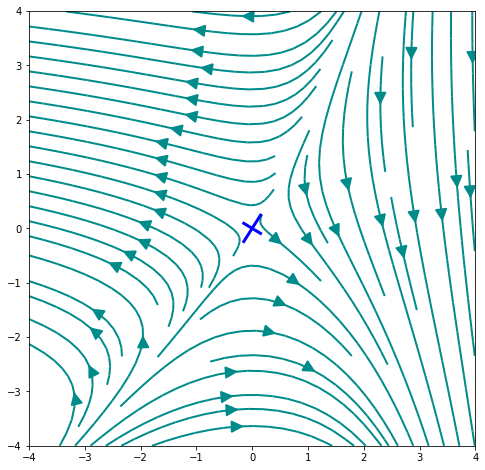

In [15]:
# Get eigenvalues and eigenvectors
l1,l2,v1,v2 = get_eigen(J)

# Set boundaries
scl = 4.
xlo,xhi,ylo,yhi = -1.*scl, 1.*scl, -1.*scl, 1.*scl
lims = [[xlo,xhi],[ylo,yhi]]
scl = 0.15
xlo,xhi,ylo,yhi = -1.*scl, 1.*scl, -1.*scl, 1.*scl
lims_local = [[xlo,xhi],[ylo,yhi]]

# Plot
plt.figure(figsize=(8,8))
plot_vector_field(lims,V)
plot_local_manifold(lims_local,V,v1)
plot_local_manifold(lims_local,V,v2)
#plot_global_manifold(lims,V,v1,[1.,-1.])
plt.xlim(lims[0])
plt.ylim(lims[1])